# Linear Regression

In [1]:
import tensorflow as tf
import numpy as np

from sklearn import datasets

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

sess = tf.Session()

In [2]:
# iris
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [9]:
learning_rate = 0.05
batch_size = 25

# placeholder
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [10]:
# model
model_output = tf.add(tf.matmul(x_data, A), b)

In [11]:
# loss L2 loss(square loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [12]:
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [14]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[2.4938765]]b = [[2.4316099]]
Loss = 2.7000608
Step #50 A = [[1.8654886]]b = [[3.40387]]
Loss = 0.7050278
Step #75 A = [[1.4836642]]b = [[3.9436228]]
Loss = 0.37830052
Step #100 A = [[1.2172847]]b = [[4.254748]]
Loss = 0.23884426


Text(0, 0.5, 'Sepal length')

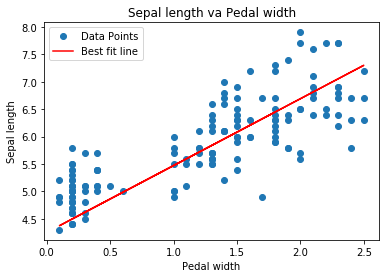

In [18]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line')
plt.legend(loc='upper left')
plt.title('Sepal length va Pedal width')
plt.xlabel('Pedal width')
plt.ylabel('Sepal length')


Text(0, 0.5, 'L2 loss')

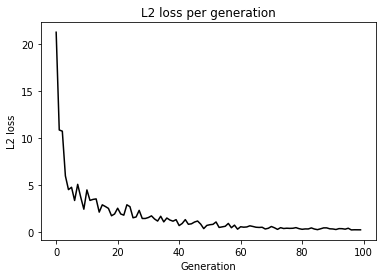

In [19]:
plt.plot(loss_vec, 'k-')
plt.title('L2 loss per generation')
plt.xlabel('Generation')
plt.ylabel('L2 loss')

# Deming Regression

In [26]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [29]:
# iris
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [30]:
learning_rate = 0.1
batch_size = 50

# placeholder
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [31]:
deming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
deming_denominator = tf.sqrt(tf.add(tf.square(A), 1))

In [32]:
# loss
loss = tf.reduce_mean(tf.truediv(deming_numerator, deming_denominator))

In [33]:
init = tf.global_variables_initializer()
sess.run(init)

In [36]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [38]:
loss_vec = []
for i in range(250):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1) % 50 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #50 A = [[3.203469]]b = [[1.5520604]]
Loss = 0.4515724
Step #100 A = [[3.1233819]]b = [[1.7046998]]
Loss = 0.41544905
Step #150 A = [[3.0314004]]b = [[1.8539323]]
Loss = 0.41860563
Step #200 A = [[2.9041295]]b = [[1.9889148]]
Loss = 0.38490963
Step #250 A = [[2.7917585]]b = [[2.146132]]
Loss = 0.39661866


Text(0, 0.5, 'Sepal length')

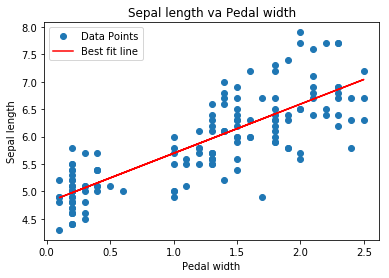

In [25]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line')
plt.legend(loc='upper left')
plt.title('Sepal length va Pedal width')
plt.xlabel('Pedal width')
plt.ylabel('Sepal length')

In [ ]:
!jupyter nbconvert tf-06.ipynb --no-output